Goals of project : Predict the variable TD9636_STAGE

Ideas : 
- Regarder la saisonalité des tempêtes par bassin ou subbassin (car peut y aavoir des changements d'un hémisphère à l'autre par exemple).
-  Regarder évolution winspeed par tempête (pendant sa durée de vie)
- Pour compléter des valeurs manquantes (comme vitesse vent par exemple) utiliser l'observation 3h avant et 3h après et faire la moyenne
- Date étudier temporalité en fonction du bassin
- Avec latitude et longitude ainsi que heures calculer la vitesse de déplacement et la direction de la tempête
- Voir si on peut mutualiser les variables

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
pd.options.display.max_info_columns = 200

# Fonctions utilisées

In [3]:
def distribution(var,df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var)
    plt.title(f"Distribution de la variable {var}")
    plt.xlabel("Modalités")
    plt.ylabel("Nombre d'individus par modalité")
    plt.show()

# Chargement des données et premières visualisations

In [4]:
path_file = "C:\\DSTI\\Machine learning project"

In [5]:
df= pd.read_csv(f"{path_file}\\ibtracs.csv")

C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_7300\1584355816.py:1: DtypeWarning: Columns (1,2,8,9,14,19,20,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(f"{path_file}\\ibtracs.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297099 entries, 0 to 297098
Data columns (total 174 columns):
 #    Column            Non-Null Count   Dtype 
---   ------            --------------   ----- 
 0    SID               297099 non-null  object
 1    SEASON            297099 non-null  object
 2    NUMBER            297099 non-null  object
 3    BASIN             256581 non-null  object
 4    SUBBASIN          264453 non-null  object
 5    NAME              297099 non-null  object
 6    ISO_TIME          297099 non-null  object
 7    NATURE            297099 non-null  object
 8    LAT               297099 non-null  object
 9    LON               297099 non-null  object
 10   WMO_WIND          297099 non-null  object
 11   WMO_PRES          297099 non-null  object
 12   WMO_AGENCY        297099 non-null  object
 13   TRACK_TYPE        297099 non-null  object
 14   DIST2LAND         297099 non-null  object
 15   LANDFALL          297099 non-null  object
 16   IFLAG             

In [7]:
df[["NAME","STORM_SPEED","STORM_DIR","SID","REUNION_LAT","REUNION_PRES"]].sample(20)

,NAME,STORM_SPEED,STORM_DIR,SID,REUNION_LAT,REUNION_PRES
116366,NIKI,10,320,1996227N08156,,
24282,TICO,8,35,1983285N09260,,
236422,HAISHEN,4,275,2015092N06161,,
167011,KETSANA,3,85,2003290N15132,,
210577,TASHA,11,210,2010358S13152,,
194676,OPHELIA,4,270,2008058S15131,,
16851,FAYE,11,275,1982227N09140,,
240152,KROVANH,8,350,2015257N14152,,
108751,JERRY,5,340,1995235N24281,,
153848,UNNAMED,14,275,2001266N10217,,


In [8]:
sids = df["SID"].unique()
print(f"The dataset contains infos on {len(sids)} different storms")

The dataset contains infos on 4768 different storms


In [9]:
df.loc[df["SID"] == "1990216N13281"]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
71260,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 00:00:00,TS,13.2,-79.5,...,,,,,,,,,15,295
71261,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 03:00:00,TS,13.5,-80.2,...,,,,,,,,,14,300
71262,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 06:00:00,TS,13.9,-80.8,...,,,,,,,,,14,305
71263,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 09:00:00,TS,14.3,-81.3,...,,,,,,,,,13,315
71264,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 12:00:00,TS,14.8,-81.8,...,,,,,,,,,12,320
71265,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 15:00:00,TS,15.2,-82.2,...,,,,,,,,,12,320
71266,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 18:00:00,TS,15.7,-82.6,...,,,,,,,,,12,315
71267,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-04 21:00:00,TS,16.2,-83.1,...,,,,,,,,,13,315
71268,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-05 00:00:00,TS,16.6,-83.6,...,,,,,,,,,13,310
71269,1990216N13281,1990,57,NaN,CS,DIANA,1990-08-05 03:00:00,TS,17.0,-84.2,...,,,,,,,,,14,305


In [10]:
df["SUBBASIN"].unique()

array([' ', 'MM', 'EA', 'WA', 'CP', nan, 'GM', 'CS', 'BB', 'AS'],
      dtype=object)

In [11]:
df[["SID","NUMBER","SEASON"]].iloc[50000:50020]

,SID,NUMBER,SEASON
50000,1987200N04191,42,1987
50001,1987200N04191,42,1987
50002,1987200N04191,42,1987
50003,1987200N04191,42,1987
50004,1987200N04191,42,1987
50005,1987200N04191,42,1987
50006,1987200N04191,42,1987
50007,1987200N04191,42,1987
50008,1987200N04191,42,1987
50009,1987200N04191,42,1987


In [12]:
df["SEASON"].unique()

array(['Year', '1980', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025], dtype=object)

In [13]:
list = df["NAME"].unique()
len(list)

1536

# Analyses des variables

### Variable cible

In [14]:
df["TD9636_STAGE"].unique()
# Des valeurs de 0 à 6 avec des valeurs nulles

array([' ', '1', '2', '4', '0', '6', '5', '3'], dtype=object)

In [15]:
df["TD9636_STAGE"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
297094    False
297095    False
297096    False
297097    False
297098    False
Name: TD9636_STAGE, Length: 297099, dtype: bool

TD9636_STAGE
     248756
2     17204
1     16028
4     10623
0      3156
3       742
5       331
6       259
Name: count, dtype: int64


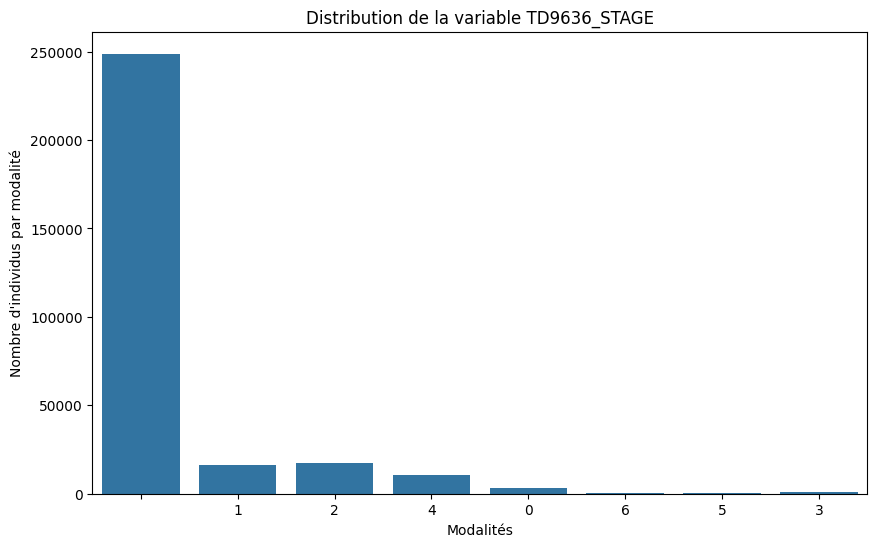

In [16]:
print(df['TD9636_STAGE'].value_counts())
distribution('TD9636_STAGE', df)

Nous allons regarder quelles sont ces fameuses valeurs vides et comprendre si il y une raison.

In [17]:
df.loc[df["TD9636_STAGE"] == " "].sample(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
252761,2017277N11279,2017,81,NaN,CS,NATE,2017-10-04 03:00:00,DS,11.5,-81.3,...,,,,,,,,,4,325
143894,2000056S17152,2000,13,SI,WA,STEVE,2000-03-08 06:00:00,TS,-24.5,113.2,...,,,,,,,,,5,200
173689,2004263N13153,2004,75,WP,MM,MEARI,2004-10-02 06:00:00,ET,36.0,152.7,...,,,,,,,,,9,180
208706,2010244N12328,2010,53,NaN,NaN,GASTON,2010-09-01 18:00:00,TS,12.9,-36.1,...,,,,,,,,,11,280
220974,2012266N14254,2012,64,EP,MM,MIRIAM,2012-10-02 09:00:00,DS,16.7,-116.0,...,,,,,,,,,5,270
80359,1991281N12265,1991,73,EP,MM,MARTY,1991-10-15 09:00:00,TS,17.4,-112.9,...,,,,,,,,,9,250
273523,2020296N09137,2020,97,WP,MM,MOLAVE,2020-10-23 06:00:00,MX,10.3,134.0,...,,,,,,,,,9,305
221737,2012296N06135,2012,78,WP,MM,SON-TINH,2012-10-26 00:00:00,TS,14.6,115.7,...,,,,,,,,,12,280
181447,2005318N13298,2005,105,NaN,CS,GAMMA,2005-11-21 15:00:00,DS,16.6,-84.6,...,,,,,,,,,6,120
180305,2005262N13127,2005,81,WP,MM,DAMREY,2005-09-19 06:00:00,TS,13.2,127.0,...,,,,,,,,,11,305


On regarde si il y a un lien entre les valeurs manquantes de la variable cible et la variable nature.
Nous allons regarder cela sur plusieurs axes : le type de tempête, les zones géographiques et les dates.

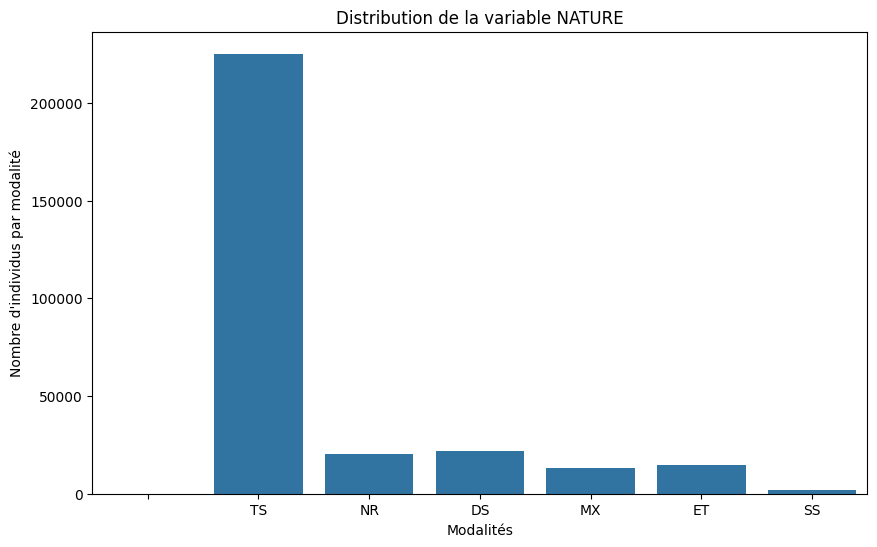

In [18]:
distribution('NATURE',df)

In [19]:
df_filtered = df.loc[df["TD9636_STAGE"] != " "]

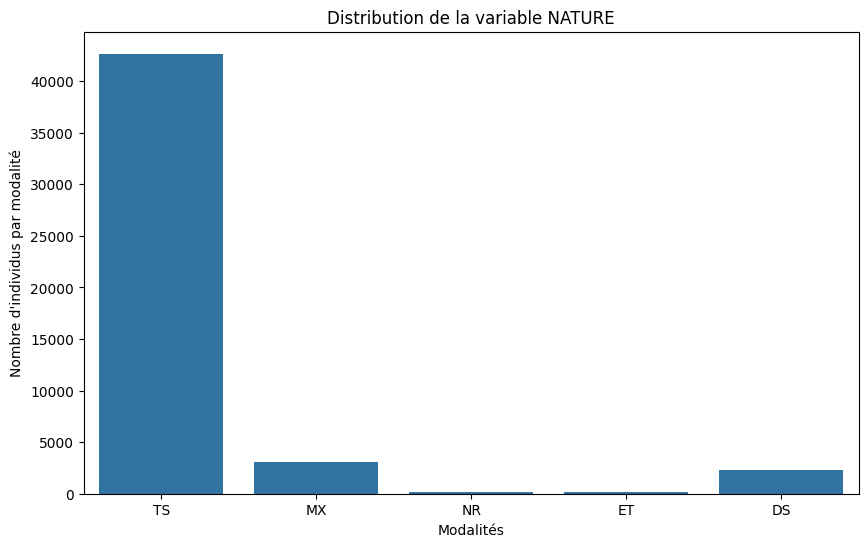

In [20]:
distribution("NATURE", df_filtered)

Pas vraiument de lien

In [21]:
df["BASIN"]

0           
1         SP
2         SP
3         SP
4         SP
          ..
297094    WP
297095    WP
297096    WP
297097    WP
297098    WP
Name: BASIN, Length: 297099, dtype: object

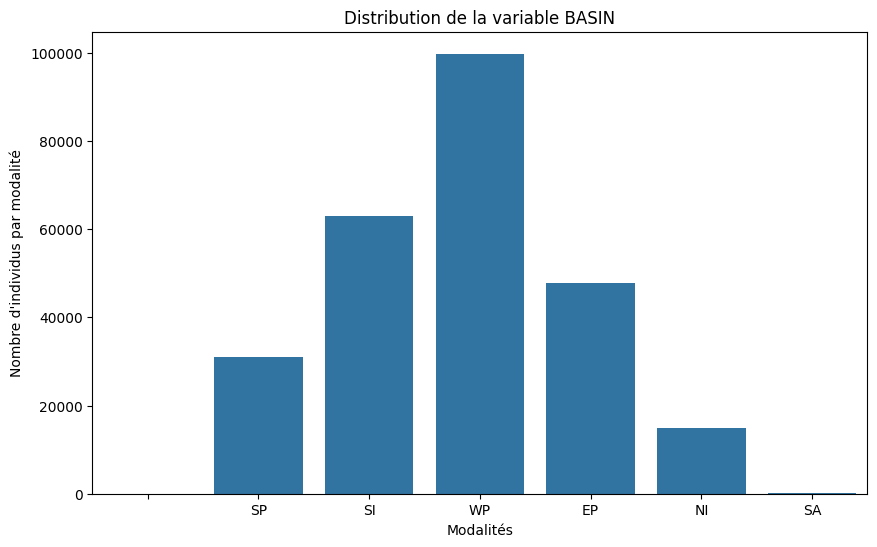

In [22]:
distribution("BASIN", df)

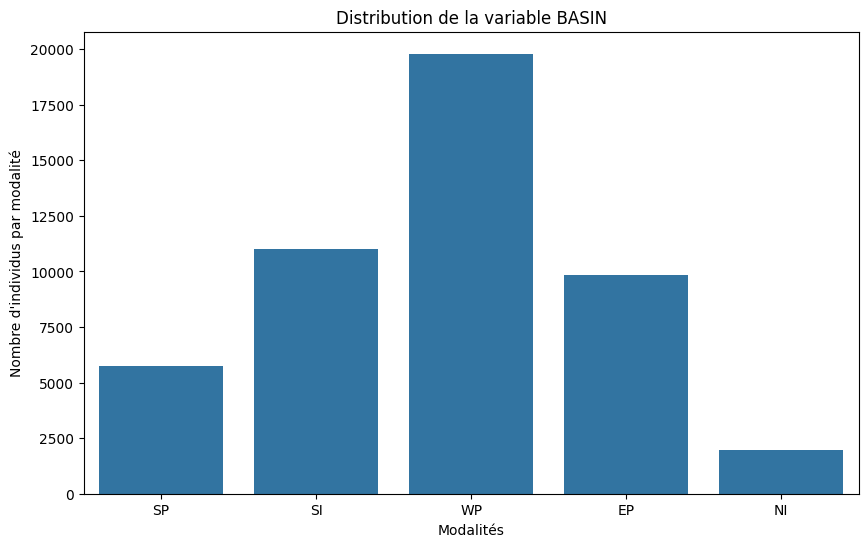

In [23]:
distribution("BASIN", df_filtered)

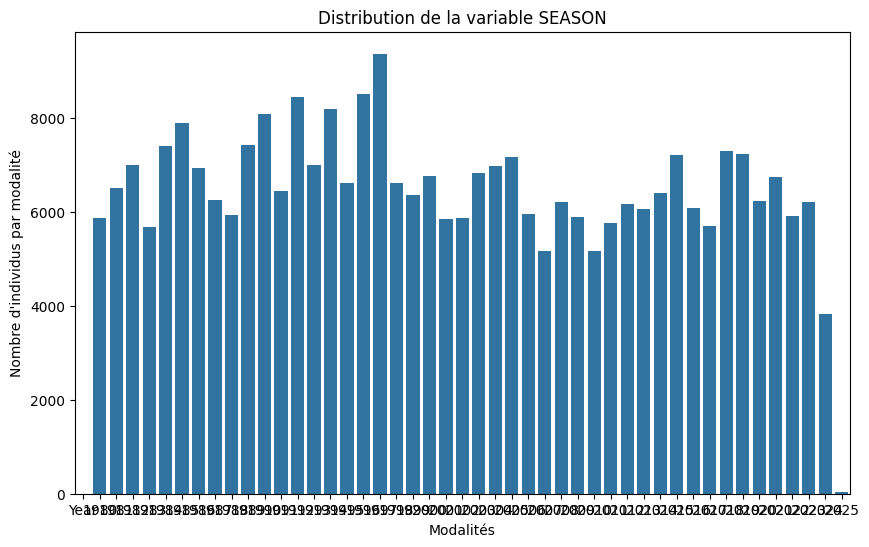

In [24]:
distribution("SEASON", df)

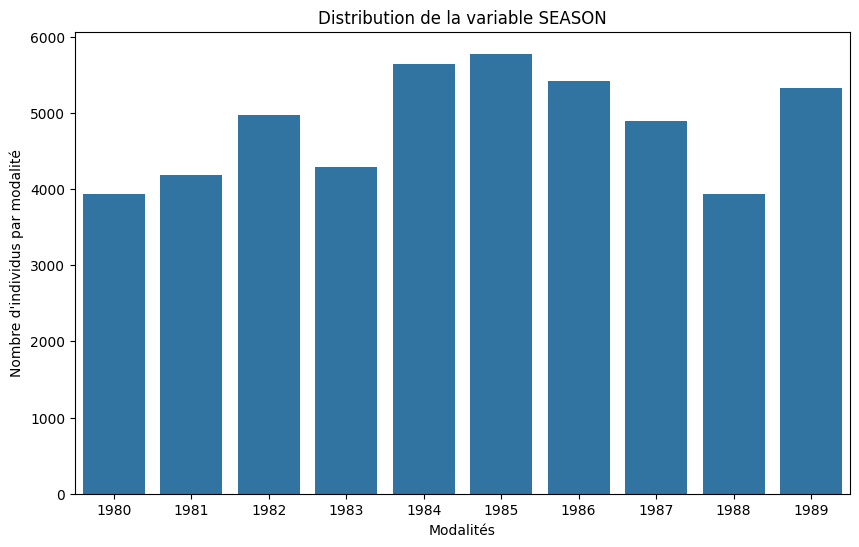

In [25]:
distribution("SEASON", df_filtered)

Donc ici nous remarquons que cette mesure a uniquement été effectuée entre 1980 et 1989. Donc Pour étudier la variable cible, nous étudierons uniquement des observations entre 1980 et 1989.

### Analyse de la variable WMO_AGENCY

Cette variable fait référence aux agences responsables de la surveillance des différent bassins

In [26]:
df["WMO_AGENCY"].unique()

array([' ', 'wellington', 'reunion', 'bom', 'cphc', 'tokyo', 'hurdat_epa',
       'hurdat_atl', 'newdelhi', 'nadi', 'atcf'], dtype=object)

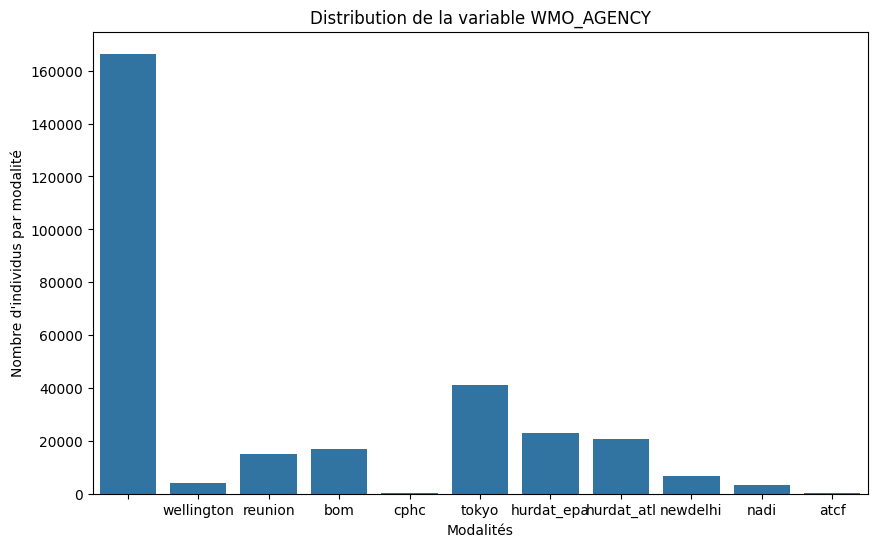

In [27]:
distribution("WMO_AGENCY",df)

On remarque aussi que la majorité ne sont pas renseignées; Regardons s'il y a un lien avec la variable cible concernant les valeurs manquantes.

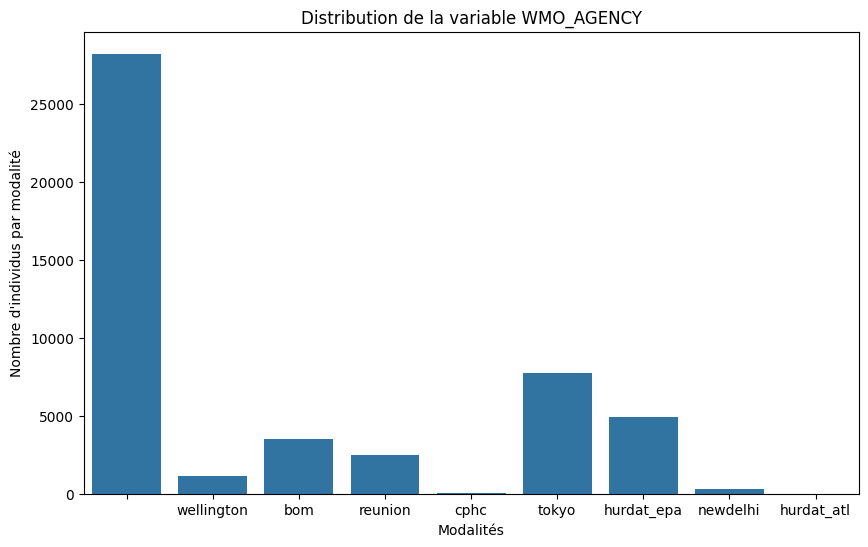

In [28]:
distribution("WMO_AGENCY",df_filtered)

Pas vraiment de lien visiblement

In [29]:
df['SEASON'] = pd.to_numeric(df['SEASON'], errors='coerce')
df_reunion = df[df['WMO_AGENCY'] == 'reunion']
df_reunion_filtered = df_reunion[df_reunion['SEASON'] < 1993]

print("Nombre de lignes avec WMO_AGENCY='reunion' avant 1993 :", len(df_reunion_filtered))
print(df_reunion_filtered['SEASON'].value_counts().sort_index())

df_imd = df[df['WMO_AGENCY'] == 'newdelhi']
df_imd_filtered = df_imd[df_imd['SEASON'] < 1990]

print("\nNombre de lignes avec WMO_AGENCY='newdelhi' avant 1990 :", len(df_imd_filtered))
print(df_imd_filtered['SEASON'].value_counts().sort_index())

Nombre de lignes avec WMO_AGENCY='reunion' avant 1993 : 3803
SEASON
1980.0    274
1981.0    314
1982.0    289
1983.0    126
1984.0    429
1985.0    293
1986.0    297
1987.0    233
1988.0    322
1989.0    357
1990.0    319
1991.0    181
1992.0    369
Name: count, dtype: int64

Nombre de lignes avec WMO_AGENCY='newdelhi' avant 1990 : 578
SEASON
1982.0    139
1983.0     61
1984.0     70
1985.0     95
1986.0     24
1987.0    107
1988.0     40
1989.0     42
Name: count, dtype: int64


Cela confirme bien la doc. On a bien les agences actuelles qui sont mises et pas forcément celles de l'époque (par exemple l'agence de la Réunion n'existait pas avant 1993 donc nous ne devririons pas avoir d'observations avant cette date )

# Analyse de valeurs manquantes

In [30]:
df.replace(to_replace=" ", value=pd.NA, inplace=True)

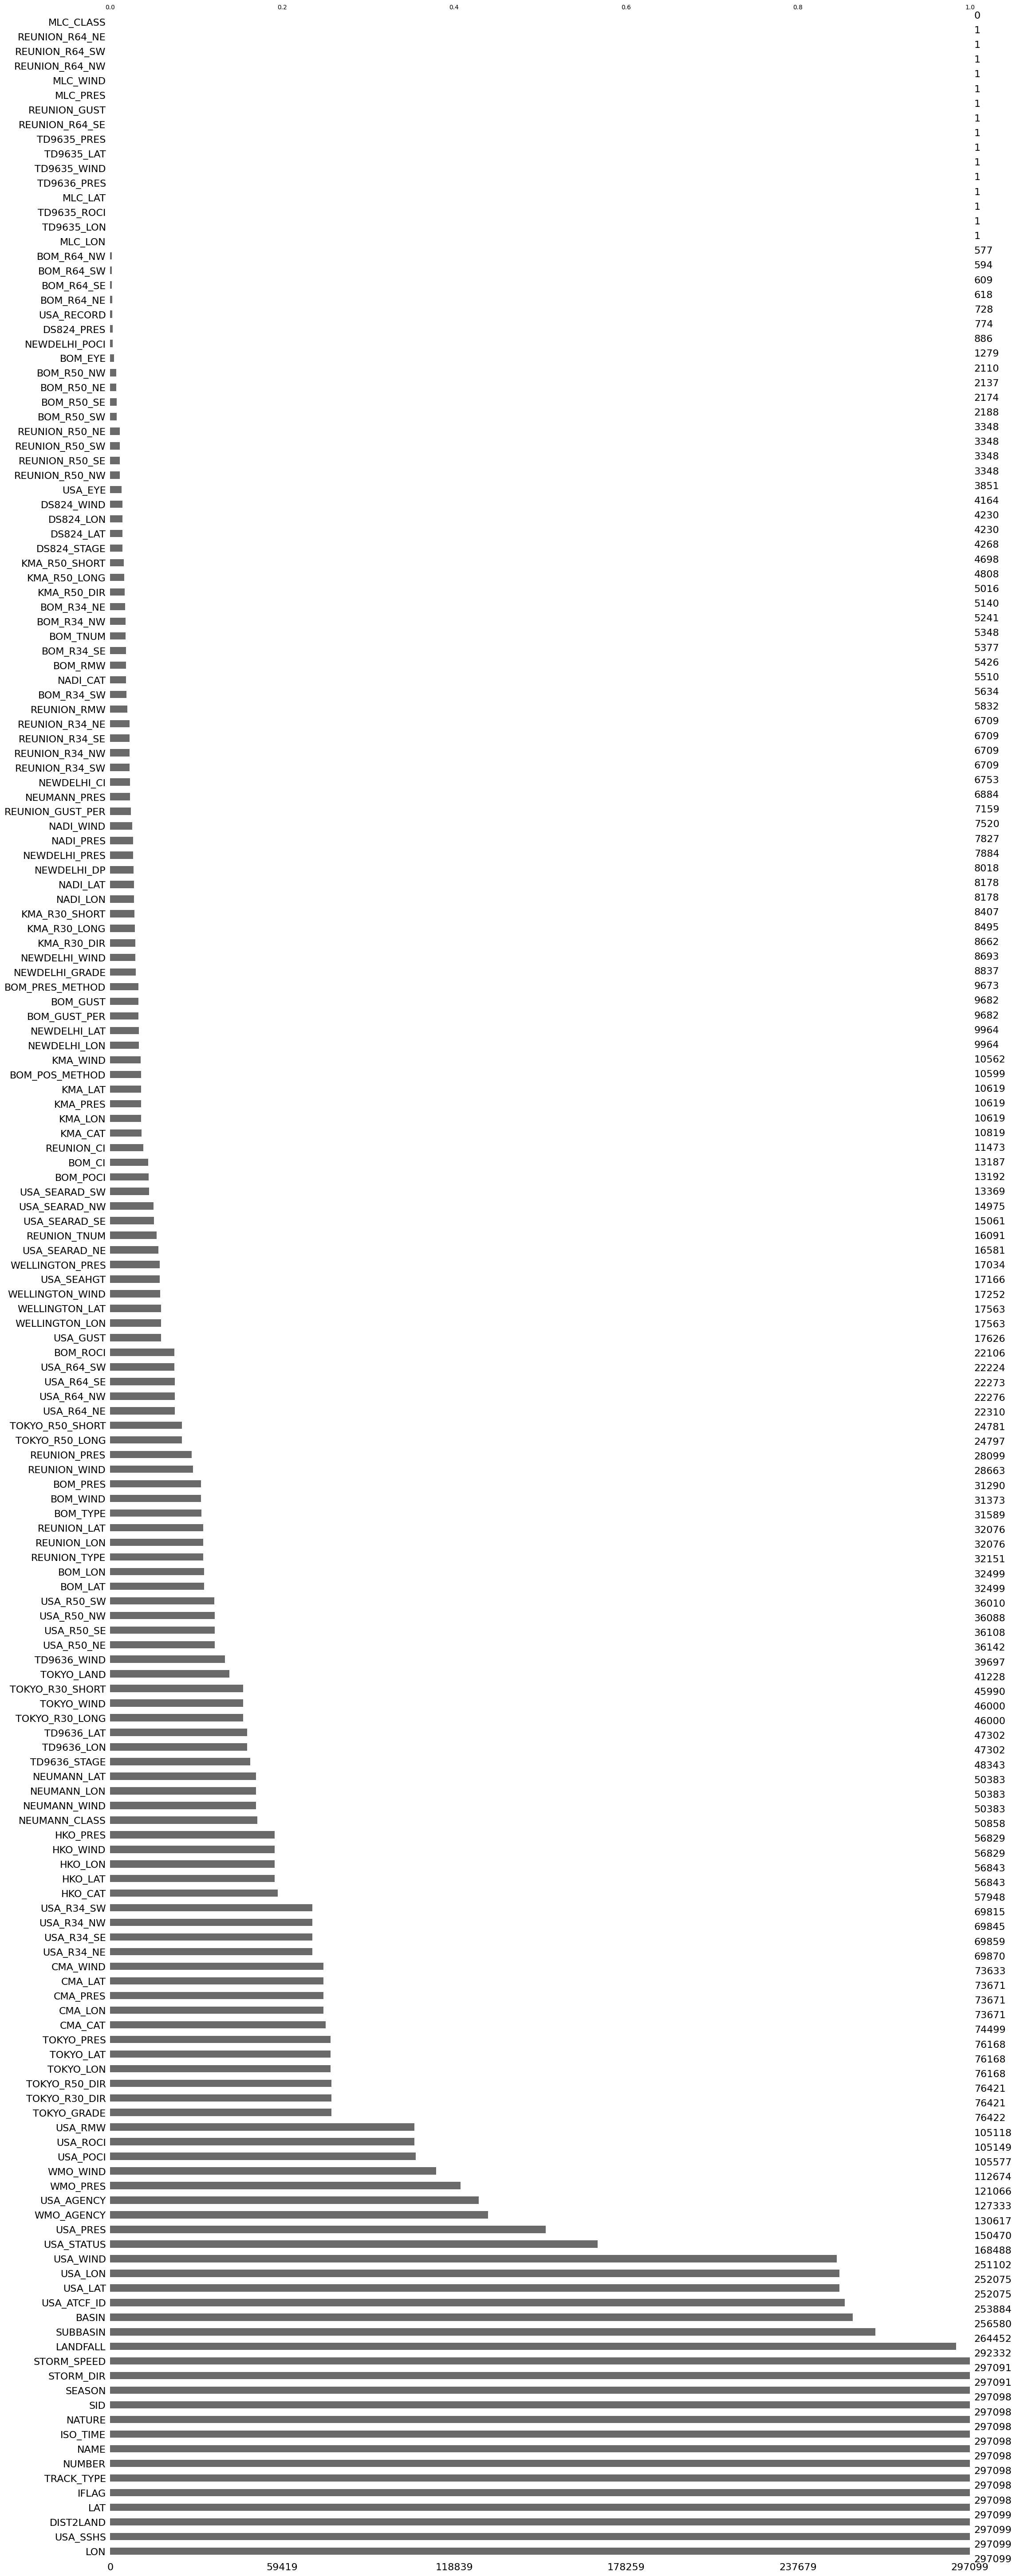

In [31]:
plt.figure(figsize=(10,6))
msno.bar(df, sort="descending")
plt.show()

En fait beaucoup de valeurs manquantes sont en fait écrites de cette manière : " " , ce qui donne un espace vide et l'illusion d'une valeur manquante.

Maintenant nous avons un vrai visuel des valeures manquantes, et nous remarquons que même pour d'autres variables que la cible, nous avons beaucoup de valeurs manquantes. Cela peut paraitre logique, ce jeu de données constitue un regroupement de données venant de différents centres d'observations, qui ne font pas forcément tous les mêmes mesures, ou n'ont pas forcément tous le même niveau d'équipement.

In [32]:
df["MLC_CLASS"].sample(10)

276663    <NA>
162166    <NA>
257548    <NA>
78163     <NA>
276169    <NA>
108528    <NA>
27558     <NA>
141506    <NA>
134830    <NA>
236137    <NA>
Name: MLC_CLASS, dtype: object

# Analyse des variables temporelles

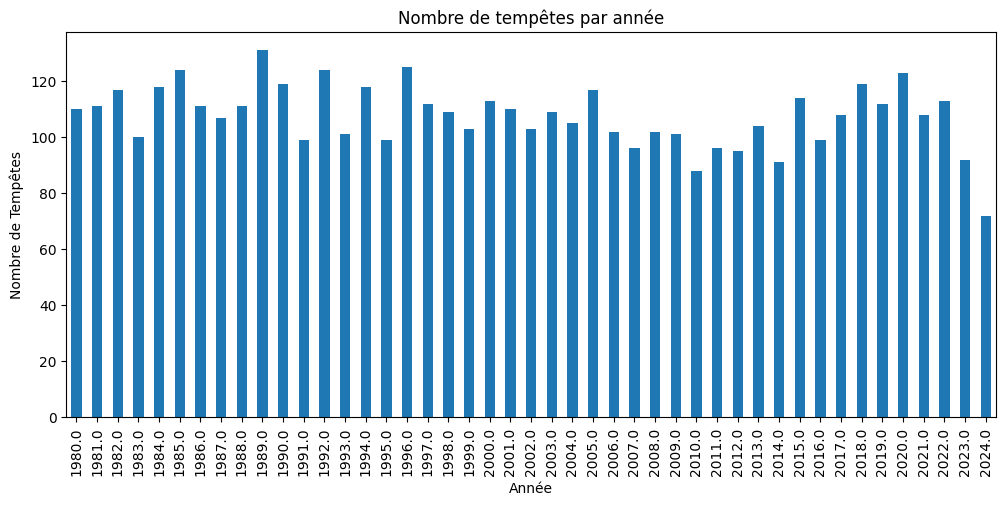

In [33]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

df['YEAR'] = df['ISO_TIME'].dt.year
df['MONTH'] = df['ISO_TIME'].dt.month



df.groupby('YEAR')['SID'].nunique().plot(kind='bar', figsize=(12,5))
plt.title("Nombre de tempêtes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de Tempêtes")
plt.show()


### Durée moyenne d'une tempête

Nombre de tempêtes : 4767
Durée moyenne (jours) : 7.567089568328554
Durée médiane (jours) : 7.0
Durée max (jours) : 32.25


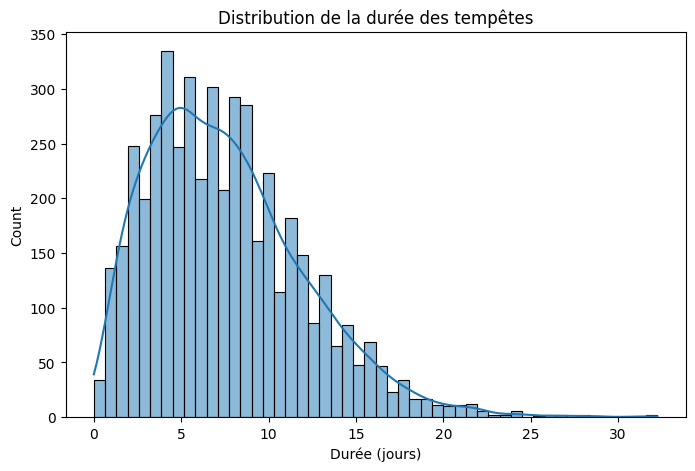

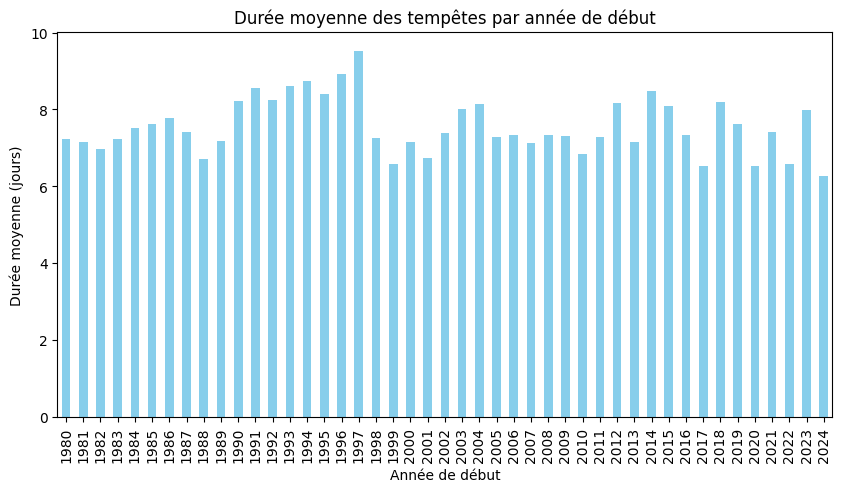

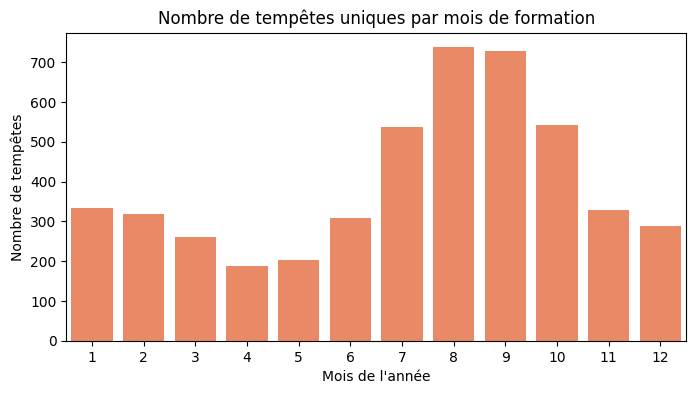

In [34]:
df = df.dropna(subset=['ISO_TIME'])

storm_times = df.groupby('SID')['ISO_TIME'].agg(['min', 'max'])

storm_times['duration_days'] = (storm_times['max'] - storm_times['min']).dt.total_seconds() / (3600 * 24)

# Quelques statistiques globales sur les durées
print("Nombre de tempêtes :", len(storm_times))
print("Durée moyenne (jours) :", storm_times['duration_days'].mean())
print("Durée médiane (jours) :", storm_times['duration_days'].median())
print("Durée max (jours) :", storm_times['duration_days'].max())

plt.figure(figsize=(8,5))
sns.histplot(data=storm_times, x='duration_days', bins=50, kde=True)
plt.xlabel("Durée (jours)")
plt.title("Distribution de la durée des tempêtes")
plt.show()

storm_times['start_year'] = storm_times['min'].dt.year
storm_times['end_year'] = storm_times['max'].dt.year

annual_stats = storm_times.groupby('start_year')['duration_days'].mean()

plt.figure(figsize=(10,5))
annual_stats.plot(kind='bar', color='skyblue')
plt.title("Durée moyenne des tempêtes par année de début")
plt.xlabel("Année de début")
plt.ylabel("Durée moyenne (jours)")
plt.show()

# Saisonnalité: mois de début
df['start_month'] = df.groupby('SID')['ISO_TIME'].transform('min').dt.month
monthly_counts = df.groupby('start_month')['SID'].nunique().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color='coral')
plt.title("Nombre de tempêtes uniques par mois de formation")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de tempêtes")
plt.show()

# Supplément d'idées:
#  - Durée vs intensité max (s'il existe une colonne WMO_WIND, par ex.)
#  - Durée par bassin (BASIN) ou par région
#  - Distribution des durées avant 1980 vs après 2000, etc.


On remarque qu'il y a une saisonnalité pour les tempêtes, avec beaucoup plus de tempêtes de Juillet à Octobre.

# Faire la même analyse pour chaque bassin (ex : comparer hémisphère sud et hémisphère nord)

# Variables géographiques

In [35]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [36]:
df["SID"].unique()

array(['1980001S13173', '1980002S15081', '1980003S15137', ...,
       '2024276S10076', '2024278N21265', '2024280N18146'],
      shape=(4767,), dtype=object)

In [37]:
df_unique = df.loc[df["SID"] == "1980001S13173"]
df_unique

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,YEAR,MONTH,start_month
1,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5,172.5,...,<NA>,<NA>,<NA>,<NA>,<NA>,6,350,1980.0,1.0,1
2,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.2,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,6,350,1980.0,1.0,1
3,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,5,360,1980.0,1.0,1
4,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 09:00:00,TS,-11.7,172.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,10,1980.0,1.0,1
5,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 12:00:00,TS,-11.5,172.5,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,20,1980.0,1.0,1
6,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 15:00:00,TS,-11.3,172.6,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,35,1980.0,1.0,1
7,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 18:00:00,TS,-11.2,172.7,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,55,1980.0,1.0,1
8,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-01 21:00:00,TS,-11.2,172.9,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,85,1980.0,1.0,1
9,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-02 00:00:00,TS,-11.2,173.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,130,1980.0,1.0,1
10,1980001S13173,1980.0,1,SP,MM,PENI,1980-01-02 03:00:00,TS,-11.3,173.1,...,<NA>,<NA>,<NA>,<NA>,<NA>,4,150,1980.0,1.0,1


C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_7300\4014313379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_7300\4014313379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['LON'] = pd.to_numeric(df['LON'], errors='coerce')


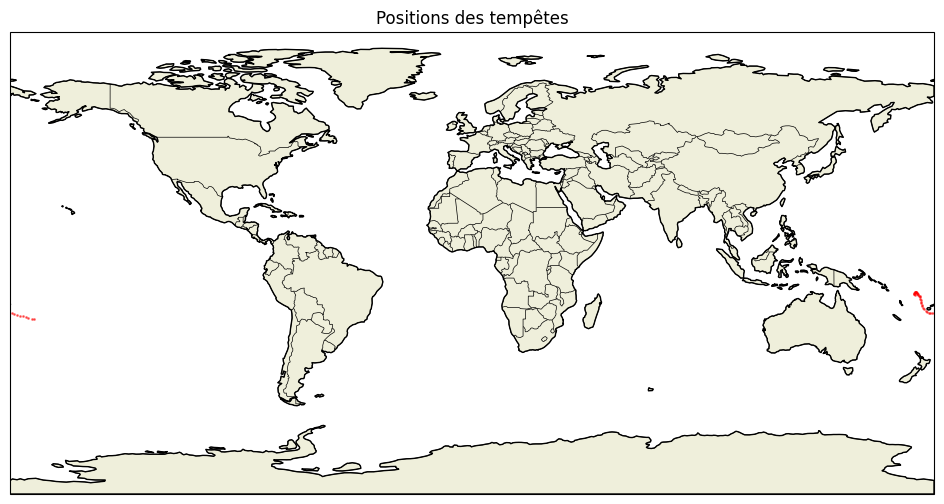

In [38]:
df_unique['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df_unique['LON'] = pd.to_numeric(df['LON'], errors='coerce')


plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_global()

plt.scatter(df_unique['LON'], df_unique['LAT'], color='red', s=1, transform=ccrs.PlateCarree(), alpha=0.5)

plt.title("Positions des tempêtes")
plt.show()

In [39]:
print(df['LAT'].dtype, df['LON'].dtype)

object object


In [40]:
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

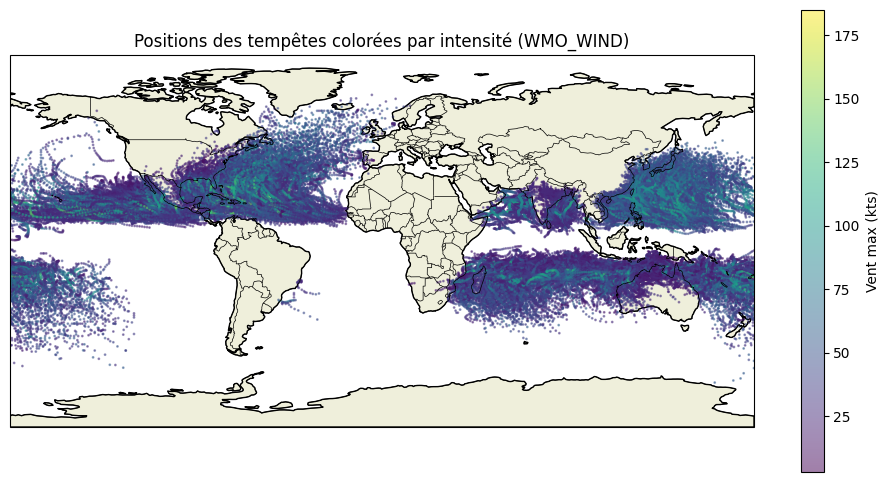

In [41]:
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=df['WMO_WIND'].min(), vmax=df['WMO_WIND'].max(), clip=True)
cmap = plt.cm.viridis  

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_global()

scatter = plt.scatter(
    df['LON'], df['LAT'], 
    c=df['WMO_WIND'], cmap=cmap, norm=norm, 
    s=1, transform=ccrs.PlateCarree(), alpha=0.5
)
plt.colorbar(scatter, label="Vent max (kts)")
plt.title("Positions des tempêtes colorées par intensité (WMO_WIND)")
plt.show()


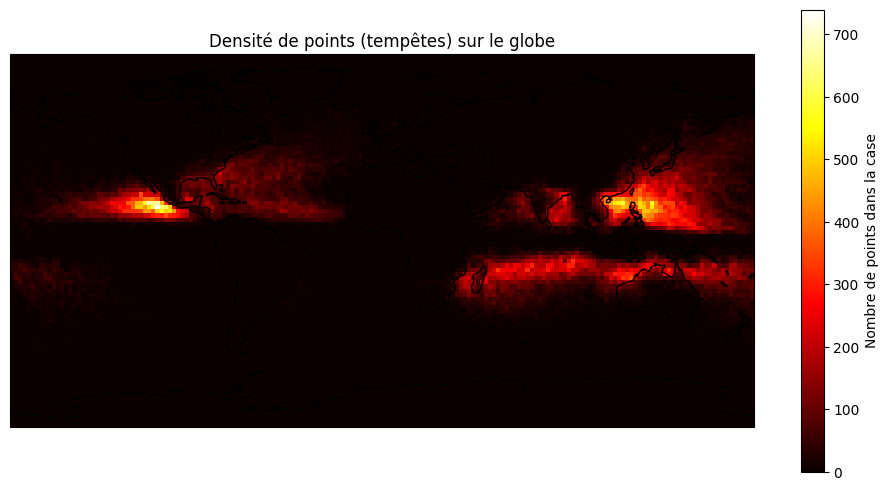

In [42]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


lon_bins = np.linspace(-180, 180, 180)  
lat_bins = np.linspace(-90, 90, 90)    

plt.hist2d(df['LON'], df['LAT'], bins=[lon_bins, lat_bins], transform=ccrs.PlateCarree(), cmap='hot')
plt.colorbar(label="Nombre de points dans la case")

plt.title("Densité de points (tempêtes) sur le globe")
plt.show()

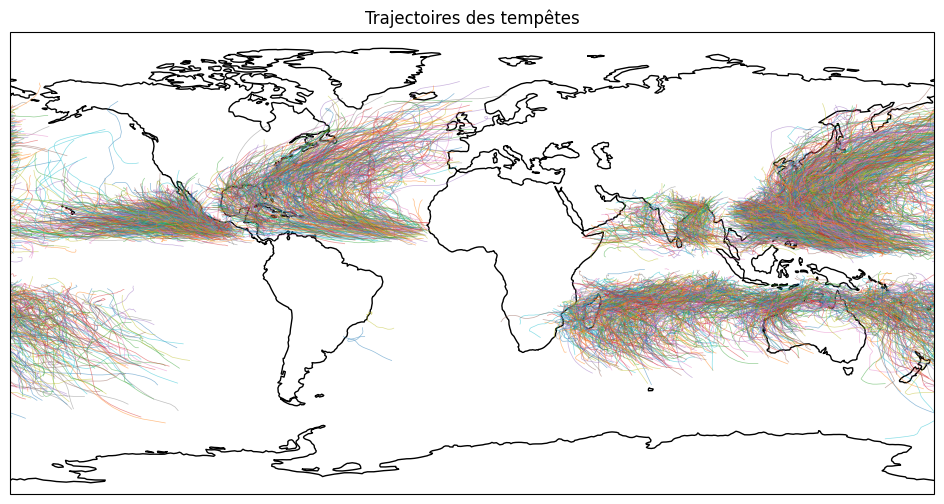

In [43]:
grouped = df.groupby('SID')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

for sid, group in grouped:
    group = group.sort_values('ISO_TIME')
    plt.plot(group['LON'], group['LAT'], transform=ccrs.PlateCarree(), linewidth=0.5, alpha=0.5)

plt.title("Trajectoires des tempêtes")
plt.show()

In [44]:
df['DIST2LAND'] = pd.to_numeric(df['DIST2LAND'], errors='coerce')
df_dist = df.dropna(subset=['DIST2LAND'])

count_under_100 = (df_dist['DIST2LAND'] < 100).sum()
print(f"Nombre d'observations à < 100 km de la côte : {count_under_100}")


bins = [0, 100, 200, 500, np.inf]
labels = ["<100km", "100-200km", "200-500km", "500km+"]
df_dist['DIST_CAT'] = pd.cut(df_dist['DIST2LAND'], bins=bins, labels=labels)

print("\nRépartition des observations par classe de distance :")
print(df_dist['DIST_CAT'].value_counts())

df_min_dist = df_dist.groupby('SID')['DIST2LAND'].min().reset_index(name='MIN_DIST2LAND')
tempetes_under_100 = (df_min_dist['MIN_DIST2LAND'] < 100).sum()
print(f"\nNombre de tempêtes ayant approché <100 km des côtes : {tempetes_under_100}")


Nombre d'observations à < 100 km de la côte : 45027

Répartition des observations par classe de distance :
DIST_CAT
500km+       167505
200-500km     61306
100-200km     22867
<100km        22256
Name: count, dtype: int64

Nombre de tempêtes ayant approché <100 km des côtes : 2609


In [45]:
df_dist.groupby('BASIN')['DIST2LAND'].mean()

BASIN
EP    982.281001
NI    290.458703
SA    337.243697
SI    894.985333
SP    684.754622
WP    843.008029
Name: DIST2LAND, dtype: float64

# Préparation du jeu de données

## Nettoyage du jeu de données

Provisoirement suppression des valeurs manquantes pour la variable cible. Je ferai une étude plus approfondie plus tard

## Feature engineering

### Variables temporelles

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297098 entries, 1 to 297098
Data columns (total 177 columns):
 #    Column            Non-Null Count   Dtype         
---   ------            --------------   -----         
 0    SID               297098 non-null  object        
 1    SEASON            297098 non-null  float64       
 2    NUMBER            297098 non-null  object        
 3    BASIN             256580 non-null  object        
 4    SUBBASIN          264452 non-null  object        
 5    NAME              297098 non-null  object        
 6    ISO_TIME          297098 non-null  datetime64[ns]
 7    NATURE            297098 non-null  object        
 8    LAT               297098 non-null  float64       
 9    LON               297098 non-null  float64       
 10   WMO_WIND          112673 non-null  float64       
 11   WMO_PRES          121065 non-null  object        
 12   WMO_AGENCY        130617 non-null  object        
 13   TRACK_TYPE        297098 non-null  object      

Création d'une variable de début de tempête et de l'âge de la tempête en cours

In [47]:
df['start_date'] = df.groupby('SID')['ISO_TIME'].transform('min')
df['age_hours'] = (df['ISO_TIME'] - df['start_date']).dt.total_seconds() / 3600

In [48]:
variables_temporelles = ["start_date","age_hours","SEASON","ISO_TIME","YEAR","MONTH","start_month"]

In [49]:
variable_cible = 'TD9636_STAGE' 

In [50]:
df = df.dropna(subset=[variable_cible])

In [51]:
df_temporel = df[variables_temporelles + [variable_cible]].copy()

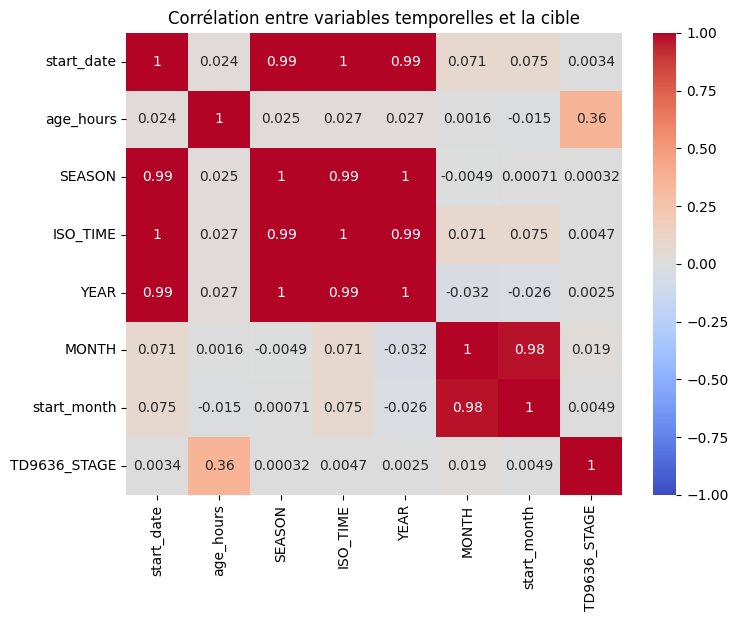

In [52]:
df_temporel[variable_cible] = pd.to_numeric(df_temporel[variable_cible], errors='coerce')
corr_mat = df_temporel.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélation entre variables temporelles et la cible")
plt.show()

ON remarque que la seule variable temporelle qui semble être correllée avec la variable cible est la variable age_hours que nous avons créé

Nous allons essayer de confirmer cela via un random forest

In [53]:
df_temporel = df_temporel.drop(columns=['start_date', 'ISO_TIME'])
variables_temporelles = ["age_hours","SEASON","YEAR","MONTH","start_month"]

       feature  importance
0    age_hours    0.637232
4  start_month    0.094307
3        MONTH    0.091408
1       SEASON    0.088918
2         YEAR    0.088135


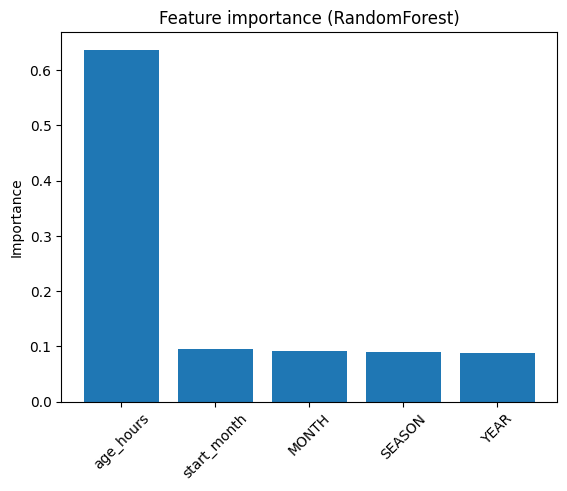

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_temporel[variable_cible] = le.fit_transform(df_temporel[variable_cible])


X = df_temporel[variables_temporelles]
y = df_temporel[variable_cible]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importance_variables_temporelles = rf.feature_importances_
df_importance_variables_temporelles = pd.DataFrame({
    'feature': variables_temporelles,
    'importance': importance_variables_temporelles
}).sort_values('importance', ascending=False)

print(df_importance_variables_temporelles)

plt.bar(df_importance_variables_temporelles['feature'], df_importance_variables_temporelles['importance'])
plt.title("Feature importance (RandomForest)")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

Le Random forest nous confirme bien l'importance d'une seule variable qui est celle de l'âge de la tempête en heures

C:\Users\PAU.HIRSINGER\AppData\Local\Temp\ipykernel_7300\3292728557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_hour_rounded'] = df['age_hours'].round(0)


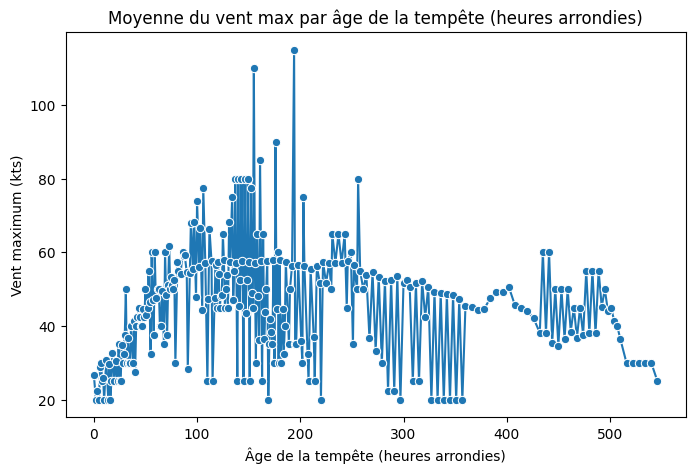

In [55]:
df['age_hour_rounded'] = df['age_hours'].round(0)

df_agg = df.groupby('age_hour_rounded')['WMO_WIND'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=df_agg, x='age_hour_rounded', y='WMO_WIND', marker='o')
plt.title("Moyenne du vent max par âge de la tempête (heures arrondies)")
plt.xlabel("Âge de la tempête (heures arrondies)")
plt.ylabel("Vent maximum (kts)")
plt.show()

In [56]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1) Arrondir l'âge à l'heure la plus proche
# df['age_hour_rounded'] = df['age_hours'].round(0)

# # 2) Calculer la moyenne de WMO_WIND par âge
# df_agg = df.groupby('age_hour_rounded')['TD9636_STAGE'].mean().reset_index()

# # 3) Tracer la courbe moyenne
# plt.figure(figsize=(8,5))
# sns.lineplot(data=df_agg, x='age_hour_rounded', y='WMO_WIND', marker='o')
# plt.title("Moyenne du vent max par âge de la tempête (heures arrondies)")
# plt.xlabel("Âge de la tempête (heures arrondies)")
# plt.ylabel("Vent maximum (kts)")
# plt.show()

### Suppression des variables avec une trop grosse proportion de NA 

Nous considérons qu'à partir d'un certain seuil, les NA deviennent compliqués à remplacer et le modèle aura du mal à utiliser les variables dans ses prédictions.

In [57]:
threshold = 0.8 
nan_ratio = df.isna().mean()
df= df.loc[:, nan_ratio < threshold]

In [58]:
nan_ratio["WMO_WIND"]

np.float64(0.6430300146867178)

In [59]:
print(f"Il reste {df.shape[1]} variables")

Il reste 59 variables


### Mutualisation des variables par zone en une seule variable

Nous remarquons que certaines variables sont les mêmes mais nommées par zones. Par exemple nous pouvons nous séparer de toutes les variables de latitude et longitude en dehors des variables globales, car cela fait doublon.

In [60]:
df = df.drop(columns=[col for col in df.columns if col.endswith('_LON') or col.endswith('_LAT')])
print(f"Il reste {df.shape[1]} variables")

Il reste 47 variables


### Variable WMO_WIND

Il s'agit de la vitesse maximale du vent soutenu enregistrée par l'agence météorologique officielle (WMO). Le problème est que les périodes d'échantillonage sont différentes en fonctiond es zones (1min ou 3 min ou 10min). Donc la variable doit être corrigée pour que les différentes zones soient comparables. Pour cela nous avons effectué des recherches sur le sujet, et nous sommes tombé sur un article scientifique qui explique comment corriger ce problème en appliquant des ratios à la variable en fonciton de la localisation de la tempête et en fonction de la durée d'échantillonage. \
Voici le lien :  \
https://www.systemsengineeringaustralia.com.au/download/WMO_TC_Wind_Averaging_27_Aug_2010.pdf

Il s'agit de la table 1.1

In [61]:
# Définition d'une fonction pour déterminer la période d'échantillonnage selon l'agence
def determine_averaging_period(agency):
    mapping = {
        'hurdat_atl': '1min',
        'hurdat_epa': '1min',
        'cphc': '1min',
        'tokyo': '10min',
        'newdelhi': '3min',
        'reunion': '10min',
        'bom': '10min',
        'nadi': '10min',
        'wellington': '10min'
    }
    return mapping.get(agency, '10min')  # Valeur par défaut à 10 min si non précisé

# Fonction pour appliquer les ratios de conversion selon la localisation et la durée d'échantillonnage
def apply_wind_conversion(row):
    dist = row['DIST2LAND']
    wind_speed = row['WMO_WIND']
    agency = row['WMO_AGENCY']

    # Déterminer la durée d'échantillonnage
    avg_period = determine_averaging_period(agency)

    # Déterminer la catégorie d'exposition en fonction de DIST2LAND
    if dist > 20:
        exposure_ratios = {'1min': 1, '3min': 1, '10min': 1.05}
    elif dist <= 1:
        exposure_ratios = {'1min': 1, '3min': 1.10, '10min': 1.16}
    else:
        exposure_ratios = {'1min': 1, '3min': 1.05, '10min': 1.11}

    return wind_speed * exposure_ratios[avg_period]


df['WMO_WIND_ADJUSTED'] = df.apply(apply_wind_conversion, axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 1 to 67410
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SID                48343 non-null  object        
 1   SEASON             48343 non-null  float64       
 2   NUMBER             48343 non-null  object        
 3   BASIN              48343 non-null  object        
 4   SUBBASIN           48343 non-null  object        
 5   NAME               48343 non-null  object        
 6   ISO_TIME           48343 non-null  datetime64[ns]
 7   NATURE             48343 non-null  object        
 8   LAT                48343 non-null  float64       
 9   LON                48343 non-null  float64       
 10  WMO_WIND           17257 non-null  float64       
 11  WMO_PRES           14759 non-null  object        
 12  WMO_AGENCY         20102 non-null  object        
 13  TRACK_TYPE         48343 non-null  object        
 14  DIST2LAND  

Comme dit juste avant les ratios sont attribués par rapport à la durée d'échantillonage et par rapport à la localisation (c'est à dire si la tempête est en mer ou proche de la côte. Pour savoir cela nous pouvons nous appuyer sur la variable DIST2LAND).

In [63]:
df[["WMO_WIND","WMO_WIND_ADJUSTED"]].sample(20)

,WMO_WIND,WMO_WIND_ADJUSTED
25175,NaN,NaN
59346,NaN,NaN
45754,NaN,NaN
61771,NaN,NaN
41481,80.0,84.00
47136,NaN,NaN
29771,NaN,NaN
10233,40.0,40.00
66109,NaN,NaN
34336,25.0,26.25


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 1 to 67410
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SID                48343 non-null  object        
 1   SEASON             48343 non-null  float64       
 2   NUMBER             48343 non-null  object        
 3   BASIN              48343 non-null  object        
 4   SUBBASIN           48343 non-null  object        
 5   NAME               48343 non-null  object        
 6   ISO_TIME           48343 non-null  datetime64[ns]
 7   NATURE             48343 non-null  object        
 8   LAT                48343 non-null  float64       
 9   LON                48343 non-null  float64       
 10  WMO_WIND           17257 non-null  float64       
 11  WMO_PRES           14759 non-null  object        
 12  WMO_AGENCY         20102 non-null  object        
 13  TRACK_TYPE         48343 non-null  object        
 14  DIST2LAND  

### Les différentes mesures de vitesse de vent

Nous essayons de comprendre la relation entre les différentes variables, notamment la différence entre WMO_WIND et TD9636_WIND

In [65]:
df[["TOKYO_WIND","USA_WIND","HKO_WIND","CMA_WIND","NEUMANN_WIND","TD9636_WIND","WMO_WIND","SID","NAME","BASIN","SUBBASIN","USA_WIND"]].sample(5)

,TOKYO_WIND,USA_WIND,HKO_WIND,CMA_WIND,NEUMANN_WIND,TD9636_WIND,WMO_WIND,SID,NAME,BASIN,SUBBASIN,USA_WIND
27226,<NA>,35,<NA>,<NA>,35,<NA>,45.0,1984076S13173,CYRIL,SP,MM,35
19008,<NA>,30,<NA>,<NA>,<NA>,30,30.0,1982293N09257,TARA,EP,MM,30
65177,50,35,35,48,<NA>,35,NaN,1989250N17148,TIP,WP,MM,35
57942,38,38,<NA>,29,<NA>,38,NaN,1988255N21159,IRMA,WP,MM,38
45680,<NA>,68,<NA>,<NA>,<NA>,69,NaN,1986264N12221,ORLENE,EP,CP,68


WMO_WIND = mesure officielle (selon l’agence WMO correspondante), mais la période de moyennage varie selon la région (1, 3 ou 10 minutes), ce qui peut compliquer la comparaison directe entre différentes zones. \
TD9636_WIND = estimation (subjective) de la vitesse maximale instantanée, homogénéisée sur une période de 1 minute, mais avec moins de garanties « officielles » et plus d’incertitudes (d’où la mise en garde sur l’interprétation).

Idées : On peut se servir de WMO_WIND en premier que l'on ajuste avec les ratios trouvés, et on peut compléter des NaN Par des valeurs de TD9636_WIND quand il y en a.
Le reste des NaN peuvent être complétés par les valeurs de avant et après dans la chronologie de la tempête

In [67]:
# Exécution de l'idée

df['WMO_WIND_ADJUSTED_COMPLETED'] = df['WMO_WIND_ADJUSTED'].fillna(df['TD9636_WIND'])

In [68]:
df.loc[df["SID"] == "1980001S13173",["age_hour_rounded","WMO_WIND_ADJUSTED_COMPLETED"]]

,age_hour_rounded,WMO_WIND_ADJUSTED_COMPLETED
1,0.0,25
2,3.0,<NA>
3,6.0,<NA>
4,9.0,<NA>
5,12.0,<NA>
6,15.0,<NA>
7,18.0,<NA>
8,21.0,<NA>
9,24.0,31.5
10,27.0,31


In [69]:
df['WMO_WIND_ADJUSTED_COMPLETED'] = pd.to_numeric(
    df['WMO_WIND_ADJUSTED_COMPLETED'], 
    errors='coerce'
)

In [70]:
# 1) Assurons-nous de trier le DataFrame par SID et par âge croissant
df = df.sort_values(by=['SID', 'age_hour_rounded'])

# 2) Pour chaque groupe (SID), on crée :
#    - forward : la valeur "remplie vers l'avant" (ffill) 
#    - backward : la valeur "remplie vers l'arrière" (bfill)
df['forward'] = df.groupby('SID')['WMO_WIND_ADJUSTED_COMPLETED'].ffill()
df['backward'] = df.groupby('SID')['WMO_WIND_ADJUSTED_COMPLETED'].bfill()

# 3) Fonction de remplissage pour chaque ligne
def fill_value(row):
    original = row['WMO_WIND_ADJUSTED_COMPLETED']
    if not pd.isna(original):
        # Si la valeur n'est pas manquante, on la garde telle quelle
        return original
    
    # Sinon, on regarde la 'forward' et la 'backward'
    f = row['forward']
    b = row['backward']
    
    # Cas 1 : Aucune des deux n'existe => reste NaN
    if pd.isna(f) and pd.isna(b):
        return np.nan
    
    # Cas 2 : Il n'y a que 'forward'
    if pd.isna(b):
        return f
    
    # Cas 3 : Il n'y a que 'backward'
    if pd.isna(f):
        return b
    
    # Cas 4 : Les deux existent => on prend la moyenne
    return (f + b) / 2

# 4) Application de la fonction
df['WMO_WIND_ADJUSTED_COMPLETED'] = df.apply(fill_value, axis=1)

# 5) On peut supprimer les colonnes temporaires si on le souhaite
df.drop(columns=['forward', 'backward'], inplace=True)

In [71]:
df.loc[df["SID"] == "1980001S13173",["age_hour_rounded","WMO_WIND_ADJUSTED_COMPLETED"]]

,age_hour_rounded,WMO_WIND_ADJUSTED_COMPLETED
1,0.0,25.000
2,3.0,28.250
3,6.0,28.250
4,9.0,28.250
5,12.0,28.250
6,15.0,28.250
7,18.0,28.250
8,21.0,28.250
9,24.0,31.500
10,27.0,31.000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 1 to 67410
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SID                          48343 non-null  object        
 1   SEASON                       48343 non-null  float64       
 2   NUMBER                       48343 non-null  object        
 3   BASIN                        48343 non-null  object        
 4   SUBBASIN                     48343 non-null  object        
 5   NAME                         48343 non-null  object        
 6   ISO_TIME                     48343 non-null  datetime64[ns]
 7   NATURE                       48343 non-null  object        
 8   LAT                          48343 non-null  float64       
 9   LON                          48343 non-null  float64       
 10  WMO_PRES                     14759 non-null  object        
 11  WMO_AGENCY                   20102 non-null  o

Nous décidons de ne garder que WMO_WIND_ADUJUSTED_COMPLETED parmis les variables de vent. En effet, il s'agit d'une amélioration des variables WMO_WIND_ADJUSTED, WMO_WIND et TD9636_WIND. De plus les autres variables de vent correspodent soit à une autre zone que celle de la tempête, soit à la zone de la tempête, mais ce qui fais doublon.

In [73]:
df = df.drop(columns=["WMO_WIND_ADJUSTED","WMO_WIND","TD9636_WIND","USA_WIND","TOKYO_WIND","CMA_WIND","HKO_WIND",
                     "NEUMANN_WIND"])